# Part-of-Speech Recognition

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/part-of-speech](https://github.com/huseinzol05/Malaya/tree/master/example/part-of-speech).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.87 s, sys: 642 ms, total: 5.51 s
Wall time: 4.51 s


/Users/huseinzolkepli/Documents/Malaya/malaya/preprocessing.py:259: FutureWarning: Possible nested set at position 2289
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


### Describe supported POS

In [2]:
malaya.pos.describe()

,Tag,Description
0,ADJ,"Adjective, kata sifat"
1,ADP,Adposition
2,ADV,"Adverb, kata keterangan"
3,ADX,"Auxiliary verb, kata kerja tambahan"
4,CCONJ,"Coordinating conjuction, kata hubung"
5,DET,"Determiner, kata penentu"
6,NOUN,"Noun, kata nama"
7,NUM,"Number, nombor"
8,PART,Particle
9,PRON,"Pronoun, kata ganti"


### List available Transformer POS models

In [3]:
malaya.pos.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,426.4,111.00,0.93280,0.93129,0.93181
tiny-bert,57.7,15.40,0.92810,0.92649,0.92704
albert,48.7,12.80,0.93199,0.91948,0.92547
tiny-albert,22.4,5.98,0.90579,0.89501,0.90002
xlnet,446.6,118.00,0.93303,0.93222,0.93236
alxlnet,46.8,13.30,0.92732,0.93046,0.92819


Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#pos-recognition

**You might want to use Tiny-Albert, a very small size, 22.4MB, but the accuracy is still on the top notch.**

In [4]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

### Load Transformer model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer POS Tagging model, transfer learning Transformer + CRF.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya.supervised.tag.transformer function
    """
```

In [6]:
model = malaya.pos.transformer(model = 'albert')

INFO:tensorflow:loading sentence piece model


### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [6]:
quantized_model = malaya.pos.transformer(model = 'albert', quantized = True)

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


#### Predict

```python
def predict(self, string: str):
    """
    Tag a string.

    Parameters
    ----------
    string : str

    Returns
    -------
    result: Tuple[str, str]
    """
```

In [7]:
model.predict(string)

[('Kuala', 'PROPN'),
 ('Lumpur:', 'PROPN'),
 ('Sempena', 'ADP'),
 ('sambutan', 'NOUN'),
 ('Aidilfitri', 'NOUN'),
 ('minggu', 'NOUN'),
 ('depan,', 'ADJ'),
 ('Perdana', 'PROPN'),
 ('Menteri', 'PROPN'),
 ('Tun', 'PROPN'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('Mohamad', 'PROPN'),
 ('dan', 'CCONJ'),
 ('Menteri', 'PROPN'),
 ('Pengangkutan', 'PROPN'),
 ('Anthony', 'PROPN'),
 ('Loke', 'PROPN'),
 ('Siew', 'PROPN'),
 ('Fook', 'PROPN'),
 ('menitipkan', 'VERB'),
 ('pesanan', 'NOUN'),
 ('khas', 'ADJ'),
 ('kepada', 'ADP'),
 ('orang', 'NOUN'),
 ('ramai', 'ADJ'),
 ('yang', 'PRON'),
 ('mahu', 'ADV'),
 ('pulang', 'VERB'),
 ('ke', 'ADP'),
 ('kampung', 'NOUN'),
 ('halaman', 'NOUN'),
 ('masing-masing.', 'DET'),
 ('Dalam', 'ADP'),
 ('video', 'NOUN'),
 ('pendek', 'ADJ'),
 ('terbitan', 'NOUN'),
 ('Jabatan', 'PROPN'),
 ('Keselamatan', 'PROPN'),
 ('Jalan', 'PROPN'),
 ('Raya', 'PROPN'),
 ('(JKJR)', 'PUNCT'),
 ('itu,', 'DET'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('menasihati', 'VERB'),
 ('mereka', '

In [7]:
quantized_model.predict(string)

[('KUALA', 'PROPN'),
 ('LUMPUR:', 'PROPN'),
 ('Sempena', 'ADP'),
 ('sambutan', 'NOUN'),
 ('Aidilfitri', 'NOUN'),
 ('minggu', 'NOUN'),
 ('depan,', 'ADJ'),
 ('Perdana', 'PROPN'),
 ('Menteri', 'PROPN'),
 ('Tun', 'PROPN'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('Mohamad', 'PROPN'),
 ('dan', 'CCONJ'),
 ('Menteri', 'PROPN'),
 ('Pengangkutan', 'PROPN'),
 ('Anthony', 'PROPN'),
 ('Loke', 'PROPN'),
 ('Siew', 'PROPN'),
 ('Fook', 'PROPN'),
 ('menitipkan', 'VERB'),
 ('pesanan', 'NOUN'),
 ('khas', 'ADJ'),
 ('kepada', 'ADP'),
 ('orang', 'NOUN'),
 ('ramai', 'ADJ'),
 ('yang', 'PRON'),
 ('mahu', 'ADV'),
 ('pulang', 'VERB'),
 ('ke', 'ADP'),
 ('kampung', 'NOUN'),
 ('halaman', 'NOUN'),
 ('masing-masing.', 'DET'),
 ('Dalam', 'ADP'),
 ('video', 'NOUN'),
 ('pendek', 'ADJ'),
 ('terbitan', 'NOUN'),
 ('Jabatan', 'PROPN'),
 ('Keselamatan', 'PROPN'),
 ('Jalan', 'PROPN'),
 ('Raya', 'PROPN'),
 ('(JKJR)', 'PUNCT'),
 ('itu,', 'DET'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('menasihati', 'VERB'),
 ('mereka', '

#### Group similar tags

```python
def analyze(self, string: str):
        """
        Analyze a string.

        Parameters
        ----------
        string : str

        Returns
        -------
        result: {'words': List[str], 'tags': [{'text': 'text', 'type': 'location', 'score': 1.0, 'beginOffset': 0, 'endOffset': 1}]}
        """
```

In [8]:
model.analyze(string)

{'words': ['Kuala',
  'Lumpur:',
  'Sempena',
  'sambutan',
  'Aidilfitri',
  'minggu',
  'depan,',
  'Perdana',
  'Menteri',
  'Tun',
  'Dr',
  'Mahathir',
  'Mohamad',
  'dan',
  'Menteri',
  'Pengangkutan',
  'Anthony',
  'Loke',
  'Siew',
  'Fook',
  'menitipkan',
  'pesanan',
  'khas',
  'kepada',
  'orang',
  'ramai',
  'yang',
  'mahu',
  'pulang',
  'ke',
  'kampung',
  'halaman',
  'masing-masing.',
  'Dalam',
  'video',
  'pendek',
  'terbitan',
  'Jabatan',
  'Keselamatan',
  'Jalan',
  'Raya',
  '(JKJR)',
  'itu,',
  'Dr',
  'Mahathir',
  'menasihati',
  'mereka',
  'supaya',
  'berhenti',
  'berehat',
  'dan',
  'tidur',
  'sebentar',
  'sekiranya',
  'mengantuk',
  'ketika',
  'memandu.'],
 'tags': [{'text': 'Kuala Lumpur:',
   'type': 'PROPN',
   'score': 1.0,
   'beginOffset': 0,
   'endOffset': 1},
  {'text': 'Sempena',
   'type': 'ADP',
   'score': 1.0,
   'beginOffset': 2,
   'endOffset': 2},
  {'text': 'sambutan Aidilfitri minggu',
   'type': 'NOUN',
   'score': 1.0

### Vectorize

Let say you want to visualize word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, string: str):
    """
    vectorize a string.

    Parameters
    ----------
    string: List[str]

    Returns
    -------
    result: np.array
    """
```

In [8]:
strings = [string, 
          'Husein baca buku Perlembagaan yang berharga 3k ringgit dekat kfc sungai petani minggu lepas, 2 ptg 2 oktober 2019 , suhu 32 celcius, sambil makan ayam goreng dan milo o ais',
          'contact Husein at husein.zol05@gmail.com',
          'tolong tempahkan meja makan makan nasi dagang dan jus apple, milo tarik esok dekat Restoran Sebulek']

In [9]:
r = [quantized_model.vectorize(string) for string in strings]

In [10]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(y)
tsne.shape

(108, 2)

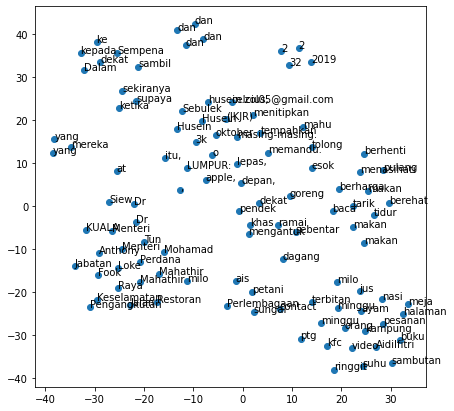

In [12]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, the model able to know cluster similar part-of-speech.

### Voting stack model

In [ ]:
alxlnet = malaya.pos.transformer(model = 'alxlnet')
malaya.stack.voting_stack([model, alxlnet, alxlnet], string)